# Analyzing Star Wars Survey Data
### Jake Lee
***
## Introduction
- What is the best Star Wars Movie?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

starwars = pd.read_csv('star_wars.csv')
print(starwars.shape)
starwars.head()

(1186, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
starwars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [3]:
# map yes and no responses to true and false
yes_no = {
    'Yes': True,
    'No' : False
}

questions = ['Have you seen any of the 6 films in the Star Wars franchise?',
            'Do you consider yourself to be a fan of the Star Wars film franchise?']

for q in questions:
    starwars[q] = starwars[q].map(yes_no)

starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
# rename movie questions
starwars = starwars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "Seen ep1",
                                    "Unnamed: 4": 'Seen_ep2',
                                    "Unnamed: 5": 'Seen_ep3',
                                    "Unnamed: 6": 'Seen_ep4',
                                    "Unnamed: 7": 'Seen_ep5',
                                    "Unnamed: 8": 'Seen_ep6'
                                    })

# movie map
episodes = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

# apply map to columnns
for i in starwars.columns[3:9]:
    starwars[i] = starwars[i].map(episodes)
    
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen ep1,Seen_ep2,Seen_ep3,Seen_ep4,Seen_ep5,Seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
for i in starwars.columns[3:9]:
    print(i,"\n", starwars[i].value_counts())

Seen ep1 
 True     673
False    513
Name: Seen ep1, dtype: int64
Seen_ep2 
 False    615
True     571
Name: Seen_ep2, dtype: int64
Seen_ep3 
 False    636
True     550
Name: Seen_ep3, dtype: int64
Seen_ep4 
 True     607
False    579
Name: Seen_ep4, dtype: int64
Seen_ep5 
 True     758
False    428
Name: Seen_ep5, dtype: int64
Seen_ep6 
 True     738
False    448
Name: Seen_ep6, dtype: int64


In [6]:
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)

#change ranking names
starwars = starwars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })



In [7]:
starwars[starwars.columns[9:15]].mean().sort_values(ascending=False)

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64

Text(0, 0.5, 'Average Rank in Descending Order')

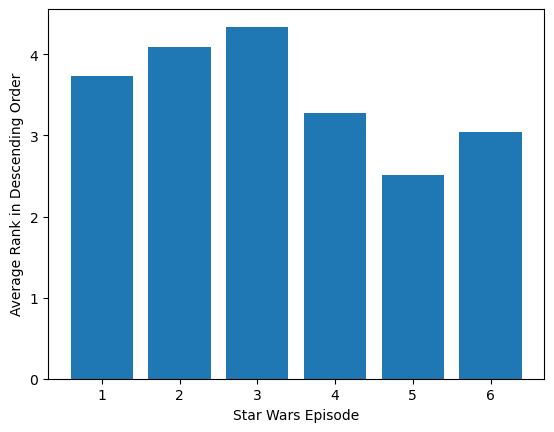

In [8]:
plt.bar(range(1,7), starwars[starwars.columns[9:15]].mean())
plt.xlabel("Star Wars Episode")
plt.ylabel("Average Rank in Descending Order")

The Original Episodes are higher ranked that the new ones.

In [9]:
starwars[starwars.columns[3:9]].sum().sort_values()

Seen_ep3    550
Seen_ep2    571
Seen_ep4    607
Seen ep1    673
Seen_ep6    738
Seen_ep5    758
dtype: int64

Text(0, 0.5, 'Number of views')

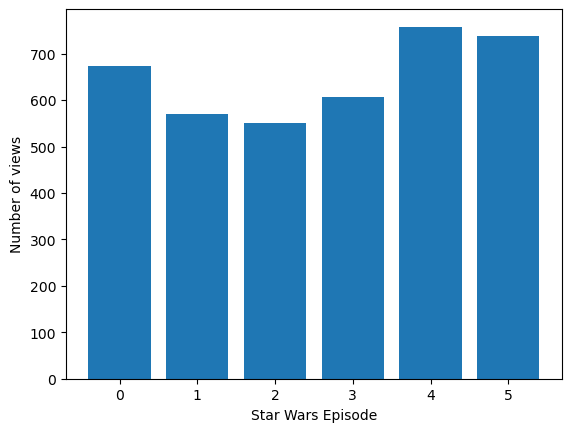

In [10]:
plt.bar(range(6), starwars[starwars.columns[3:9]].sum())
plt.xlabel("Star Wars Episode")
plt.ylabel("Number of views")

The Original Star Wars Movies have the most views.

Text(0, 0.5, 'Average Rank in Descending Order')

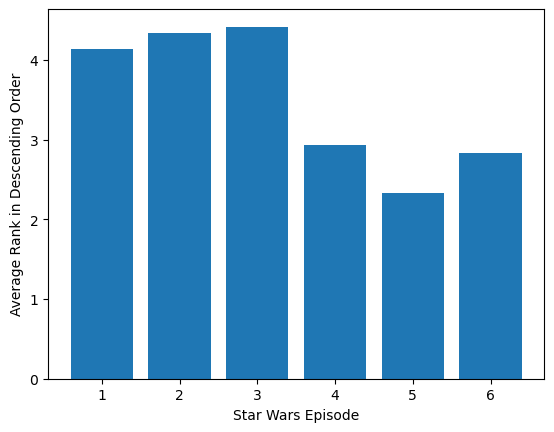

In [11]:
fans = starwars[starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nonfans = starwars[starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

plt.bar(range(1,7), fans[fans.columns[9:15]].mean())
plt.xlabel("Star Wars Episode")
plt.ylabel("Average Rank in Descending Order")

Text(0, 0.5, 'Average Rank in Descending Order')

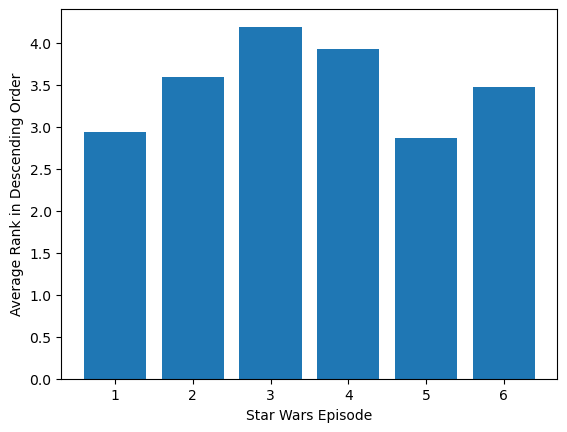

In [12]:
plt.bar(range(1,7), nonfans[nonfans.columns[9:15]].mean())
plt.xlabel("Star Wars Episode")
plt.ylabel("Average Rank in Descending Order")

Text(0, 0.5, 'Number of views')

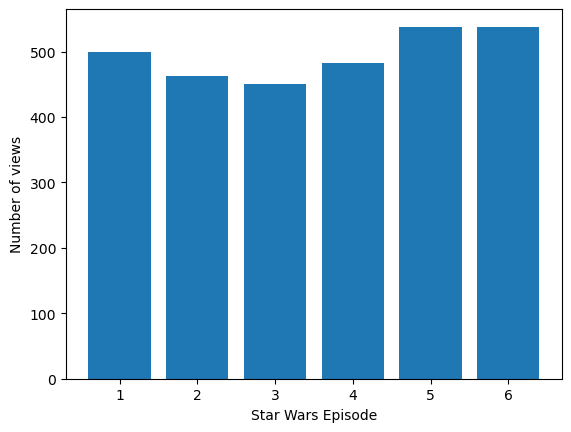

In [13]:
plt.bar(range(1,7), fans[fans.columns[3:9]].sum())
plt.xlabel("Star Wars Episode")
plt.ylabel("Number of views")

Text(0, 0.5, 'Number of views')

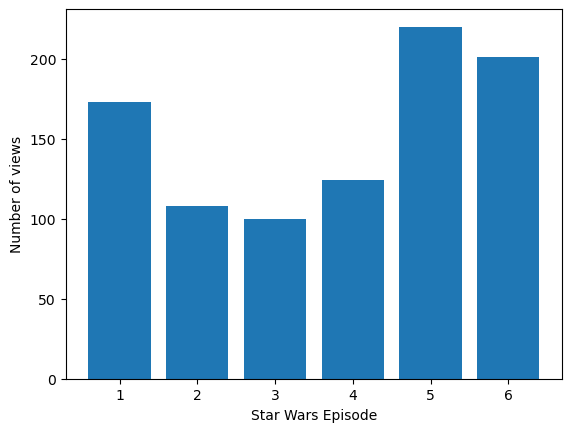

In [14]:
plt.bar(range(1,7), nonfans[nonfans.columns[3:9]].sum())
plt.xlabel("Star Wars Episode")
plt.ylabel("Number of views")